<a href="https://colab.research.google.com/github/charlesincharge/CS155/blob/revise-set-1/2022/sets/set1/src/3_notebook_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts D-F: Stochastic Gradient Descent Visualization

In this Jupyter notebook, we visualize how SGD works. This visualization corresponds to parts D-F of question 3 in set 1.

Use this notebook to write your code for problem 3 parts D-F by filling in the sections marked `# TODO` and running all cells.

In [21]:
# Install a package
!apt-get update
!apt install imagemagick

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Image
from matplotlib import animation, rc

import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/sgd_helper.py', 'sgd_helper.py')

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite
)

## Problem 3D: Implementation of SGD

Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [23]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================

    loss_calc = 0
    for ind in range(len(X)):
        loss_calc += (np.dot(X[ind], w) - Y[ind])**2

    return loss_calc

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #==============================================    
    
    gradient = -2 * (y - np.dot(w, x)) * x
    return gradient

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    W, losses = [], []
    w_new = w_start

    for epoch in range(N_epochs):
        np.random.permutation(X)

        tot_gradient = np.zeros_like(w_new)
        for ind in range(len(X)):
            w_new = w_new + eta*gradient(X[ind], Y[ind], w_new)

        W.append(w_new)
        losses.append(loss(X, Y, w_new))

        return W, losses


## Problem 3E: Visualization

### Dataset

We'll start off by generating two simple 2-dimensional datasets. For simplicity we do not consider separate training and test sets.

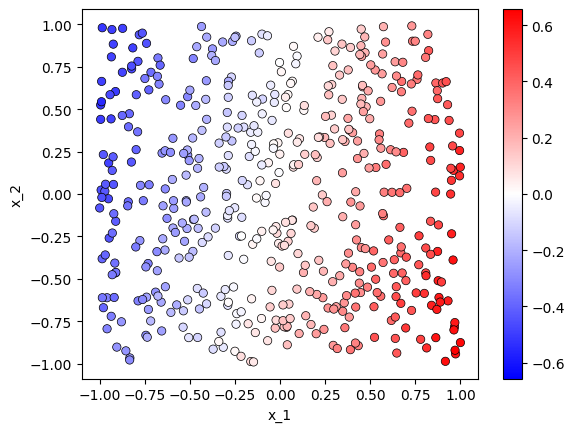

In [24]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

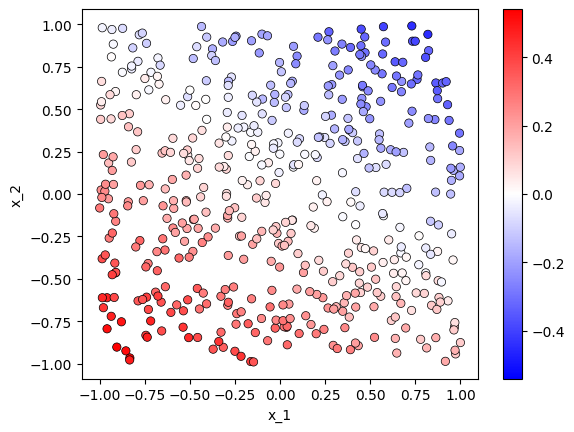

In [25]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### SGD from a single point

First, let's visualize SGD from a single starting point:

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...

Animating...


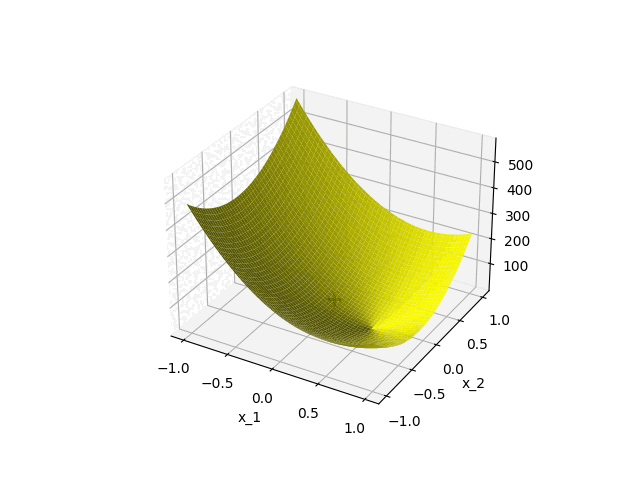

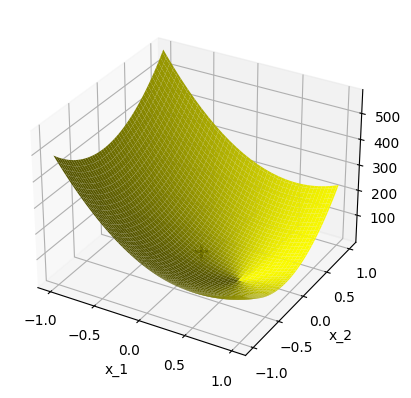

In [26]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save('animation1.gif', fps=30, writer='imagemagick')
Image(open('animation1.gif','rb').read())

Let's view how the weights change as the algorithm converges:


Animating...


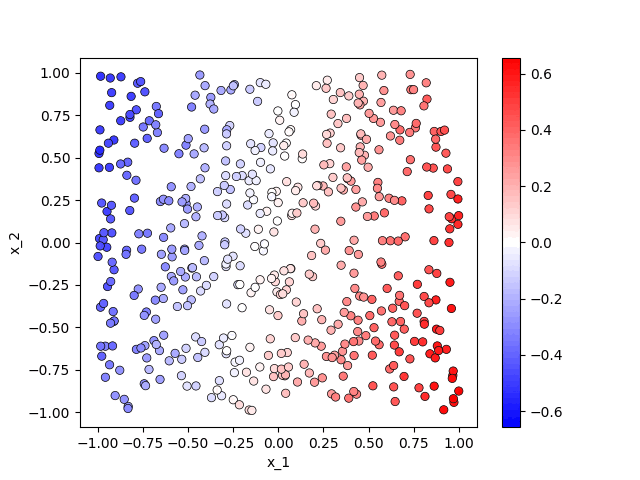

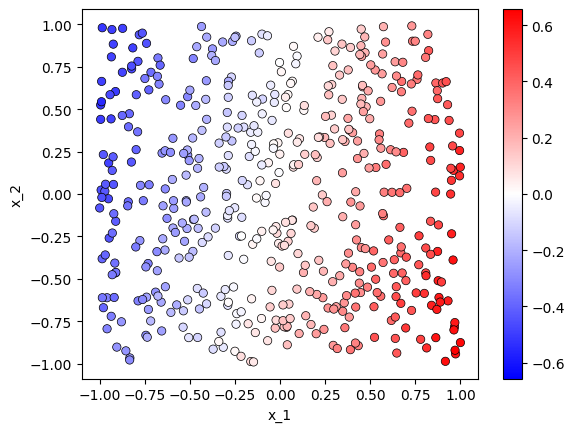

In [27]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]['w_start'], params[0]['eta'], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
anim.save('animation2.gif', fps=30, writer='imagemagick')
Image(open('animation2.gif','rb').read())

### SGD from multiple points

Now, let's visualize SGD from multiple arbitrary starting points:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


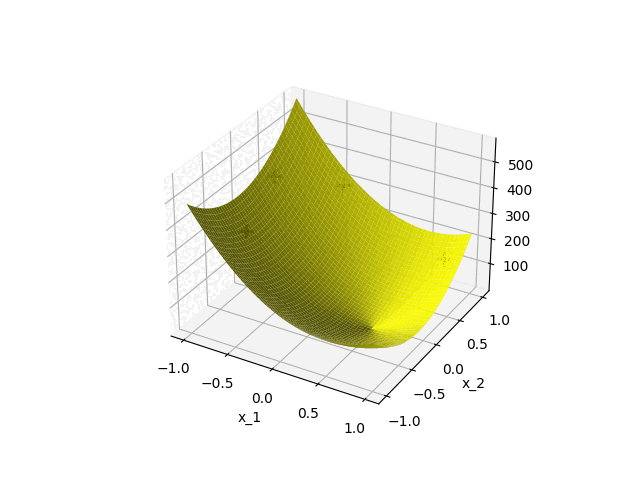

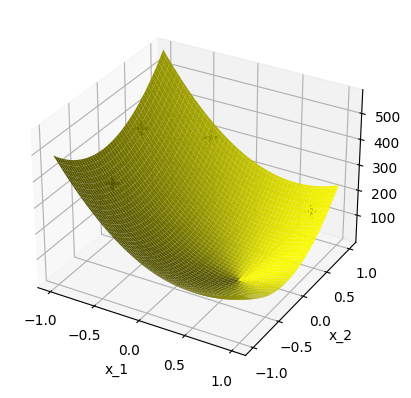

In [28]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save('animation3.gif', fps=30, writer='imagemagick')
Image(open('animation3.gif','rb').read())

Let's do the same thing but with a different dataset:

In [29]:
# Parameters to feed the SGD.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
anim.save('animation4.gif', fps=30, writer='imagemagick')
Image(open('animation4.gif','rb').read())

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...


## Problem 3F: SGD with different step sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by decreasing eta value. Also, note that we use smaller values of N_epochs and FR here for easier visualization.)

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...

Animating...


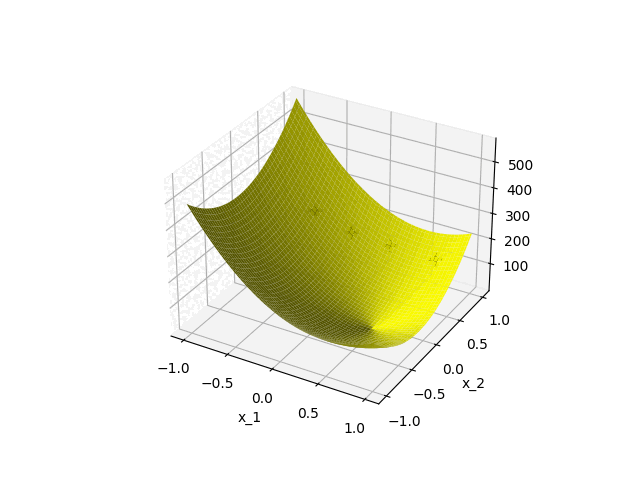

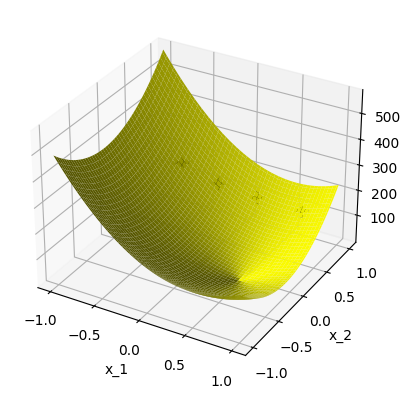

In [ ]:
# Parameters to feed the SGD.
params = (
    {'w_start': [0.7, 0.8], 'eta': 0.00001},
    { 'w_start': [0.2, 0.8], 'eta': 0.00005},
    {'w_start': [-0.2, 0.7], 'eta': 0.0001},
    {'w_start': [-0.6, 0.6], 'eta': 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation5.gif', fps=30, writer='imagemagick')
Image(open('animation5.gif','rb').read())

### Plotting SGD Convergence

Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

In [ ]:
'''Plotting SGD convergence'''

#==============================================
# TODO: For the given learning rates, plot the 
# loss for each epoch.
#==============================================

eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

Clearly, a big step size results in fast convergence! Why don't we just set eta to a really big value, then? Say, eta=1?

(Again, note that the FR is lower for this animation.)

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1} ...

Animating...


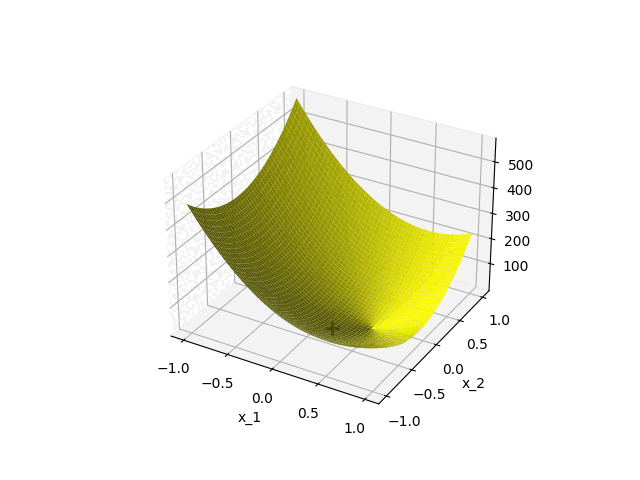

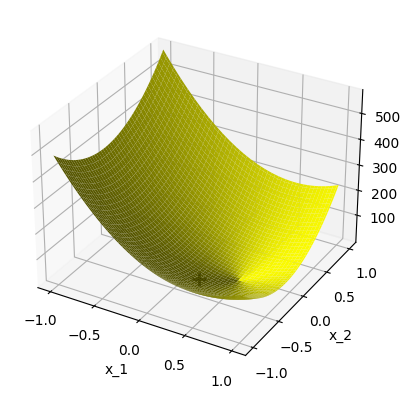

In [ ]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation6.gif', fps=30, writer='imagemagick')
Image(open('animation6.gif','rb').read())

Just for fun, let's try eta=10 as well. What happens? (Hint: look at W)

In [ ]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

C:\Users\rafwi\AppData\Local\Temp\ipykernel_9944\2262331299.py:74: RuntimeWarning: overflow encountered in multiply
  w_new = w_new - eta*gradient(X[ind], Y[ind], w_new)


## Extra Visualization (not part of the homework problem)

One final visualization! What happens if the loss function has multiple optima?

Performing SGD with parameters {'w_start': [0.9, 0.9], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [0.0, 0.0], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.8, 0.6], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.8, -0.6], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.4, -0.3], 'eta': 0.01} ...

Animating...


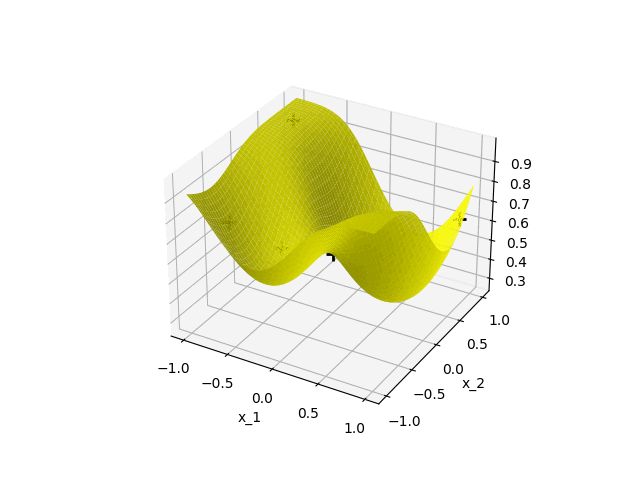

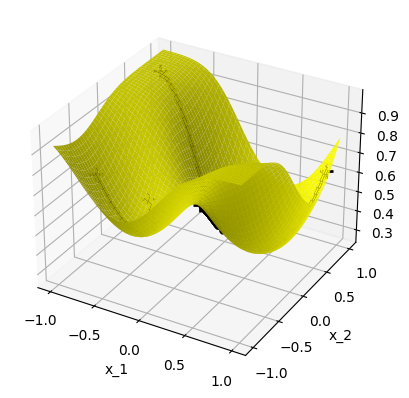

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/sgd_multiopt_helper.py', 'sgd_multiopt_helper.py')

# Import different SGD & loss functions.
# In particular, the loss function has multiple optima.
from sgd_multiopt_helper import SGD, loss

# Parameters to feed the SGD.
params = (
    {'w_start': [0.9, 0.9], 'eta': 0.01},
    { 'w_start': [0.0, 0.0], 'eta': 0.01},
    {'w_start': [-0.8, 0.6], 'eta': 0.01},
    {'w_start': [-0.8, -0.6], 'eta': 0.01},
    {'w_start': [-0.4, -0.3], 'eta': 0.01},
)
N_epochs = 100
FR = 2

# One more time!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation7.gif', fps=30, writer='imagemagick')
Image(open('animation7.gif','rb').read())